# 1. Classificação com dados desbalanceados

In [3]:
import pandas as pd
import random 
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Carregamento da base de dados
dados = pd.read_csv('credit_data.csv')

In [5]:
# Tamanho: 2000 registros e 5 colunas

dados.shape

(2000, 5)

In [6]:
# Observando
# income = rendimento (renda)
# age = idade
# loan = empréstimo (divida)
# c#default = consideração se o cliente pagou ou não o empréstimo 

dados.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
dados.isnull().sum() 

# Observa-se que 3 clientes possuem dados faltando nas idades, logo vamos apagar os registros pois não afetam diretamente 
# a base de dados

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [8]:
dados.dropna(inplace=True)

# Tirando os registros que possuem valores NaN ou vazio

In [9]:
dados.isnull().sum() 

# Verificando

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

<AxesSubplot:xlabel='c#default', ylabel='count'>

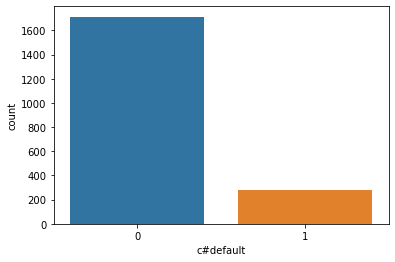

In [10]:
sns.countplot(dados['c#default'])

# Observando a contagem dos valores presentes para cada variável na coluna c#default

Percebe-se que existe uma base de dados desbalanceados e isso pode influenciar alguns métodos de machine learning, causando um overfitting ou underfitting. 

Algumas técnicas estatísticas utilizando amostragem pode trabalhar esse tipo de situação. 

In [11]:
# Para isso, vamos usar a biblioteca scikit-learn
X = dados.drop(['c#default','i#clientid'], axis=1)
y = dados['c#default']

# Ou
# X = dados.iloc[:, 1:4].values
# y = dados.iloc[:, 4].values

### Dividindo em base de dados de treino e teste/Validação

In [12]:
from sklearn.model_selection import train_test_split 

# Realiza uma amostragem estratificada

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y) 

# Realizando uma amostragem estratificada mantendo a proporção

In [14]:
X_train.shape, y_train.shape # 80% da base de dados

((1597, 3), (1597,))

In [15]:
X_test.shape, y_test.shape # 20% na base de teste

((400, 3), (400,))

In [16]:
np.unique(y, return_counts=True) # Avaliando a quantidade de valores existentes para cada classe

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [17]:
(1714/len(dados))*100 # Representatividade em (%) de quantos clientes pagam o empréstimos referentes na base

85.82874311467201

In [18]:
(283/len(dados))*100 # Representatividade em (%) de quantos clientes da base de dados que não pagam o empréstimo

14.171256885327994

In [19]:
# Verificando se os valores para as amostras após a separação aleatória dos dados são porporcionais aos valores citados 
# anteriormente

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [20]:
(1371/len(y_train))*100 # Representatividade em (%) de quantos clientes pagam o empréstimos referentes na base de treinamento

85.84846587351284

In [21]:
(226/len(y_train))*100 # Representatividade em (%) de quantos clientes da base de dados de treinamento que não pagam o empréstimo

14.151534126487164

É possível verificar que a amostra estratificada foi realizada corretamente, separando os dados porporcionalmente.

### Classificação com Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
modelo = GaussianNB()

modelo.fit(X_train, y_train) # Treiando o algoritmo com a base de dados de treinamento

GaussianNB()

In [24]:
previsoes = modelo.predict(X_test) # Prevendo o modelo pela base de teste

In [25]:
# Comparando os modelos

from sklearn.metrics import accuracy_score

accuracy_score(previsoes, y_test) # Resultado de precisão de 92%

0.93

In [26]:
# Gerando uma matriz de confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(previsoes, y_test)

Text(0.5, 1.0, 'Avaliando o modelo Naive Bayes')

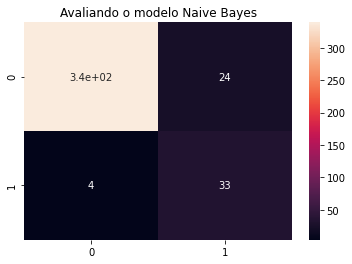

In [27]:
sns.heatmap(cm, annot=True)

plt.title('Avaliando o modelo Naive Bayes')

- Vedadeiros positivos: 337 | Falso Negativo:28
-     Falso positivo: 6     | Verdadeiro Negativo: 29

In [28]:
(337+29)/(336+28+6+29) # Vai dar o valor aproximado de cálculo de desempenho

0.9172932330827067

In [29]:
cm

array([[339,  24],
       [  4,  33]], dtype=int64)

In [30]:
# Percentual de acerto para aqueles que pagam empréstimo:
(337)/(337+28)

# É possivel observar melhor desempenho pois possuem mais dados que caracterizam o valor predito

0.9232876712328767

In [31]:
# Percentual de acerto para aqueles que não pagam o empréstimo
(29)/(29+6)

0.8285714285714286

In [32]:
# Exemplo:
# O banco possue perda de R$ 5.000,00 
# O banco possue uma lista de clientes não pagadores: 1000

(1000*18)/100 # 18 é o complemento de 82% de não pagar

# Logo, a cada 1000 clientes que solicitam empréstimo, 180 clientes vai conseguir 

180.0

In [33]:
(f'Prejuízo estimado {180 * 5000} que o sistema está dando, pois só conseguiu identificar 82% dos casos de clientes que não são bons pagadores') # Prejuízo estimado

'Prejuízo estimado 900000 que o sistema está dando, pois só conseguiu identificar 82% dos casos de clientes que não são bons pagadores'

Então, é necessário aumentar o percentual de acerto daqueles que não pagam o empréstimo que está atualmente em 82%.

### Implementação da Subamostragem (undersampling) - Algoritmo Tomek links 

In [34]:
!pip install -U imbalanced-learn

In [35]:
from imblearn.under_sampling import TomekLinks

In [36]:
tl = TomekLinks(sampling_strategy='majority') # ratio='majority' apaga somente registro da classe majoritária

X_under, y_under = tl.fit_resample(X, y)

In [37]:
X_under.shape, y_under.shape 

# Nota-se que diminuiu, apagando da classe majoritária

((1897, 3), (1897,))

In [38]:
np.unique(y, return_counts=True) # Valores originais da base de dados

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [39]:
np.unique(y_under, return_counts=True) # Valores atuais após a transformação com o TomekLink

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [40]:
# Divisão entre base treinamento e teste

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [41]:
X_train_u.shape, y_train_u.shape

((1517, 3), (1517,))

In [42]:
X_test_u.shape, y_test_u.shape

((380, 3), (380,))

In [43]:
modelo_u = GaussianNB()

modelo_u.fit(X_train_u, y_train_u)
previsoes_u = modelo_u.predict(X_test_u)

accuracy_score(previsoes_u, y_test_u)

0.9421052631578948

In [44]:
# Matriz de confusão após a mudança 

cm_u = confusion_matrix(previsoes_u, y_test_u)
cm_u

array([[319,  18],
       [  4,  39]], dtype=int64)

In [45]:
(319) / (319+16) # Acurácia para determinar os que vai conseguir o empréstimo

# Acertou 319 e errou 16, somando o total vai ser 335
# Acertos foram: 319 em porcentagem é -> (319/335)*100 -> 95,22%

0.9522388059701492

In [46]:
(41) / (41+4) # Acurácia para determinar os que não vai conseguir o empréstimo

# Acertou 41 e errou 4, somando o total de dados foram: 45
# Acertos foram: 41 em percentagem é -> (41/41+4)*100 -> 91,11% 

0.9111111111111111

Percebe-se que com a técnica o modelo conseguiu alcançar melhores desempenhos para identificação das pessoas que vai conseguir o empréstimo e também na identificação das pessoas que não vão conseguir o empréstimo. 

## Sobreamostragem (oversampling) - Smote

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(sampling_strategy='minority')

X_over, y_over = smote.fit_resample(X, y)

In [51]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [52]:
np.unique(y, return_counts=True) # Registros anteriores antes do oversampling

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [54]:
np.unique(y_over, return_counts=True) # Registros depois do oversampling

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [55]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [56]:
X_train_o.shape, X_test_o.shape

((2742, 3), (686, 3))

In [57]:
modelo_o = GaussianNB()
modelo_o.fit(X_train_o, y_train_o)

GaussianNB()

In [58]:
previsoes_o = modelo_o.predict(X_test_o)
accuracy_score(previsoes_o, y_test_o)

0.9183673469387755

In [60]:
cm_o = confusion_matrix(previsoes_o, y_test_o)
cm_o

array([[302,  15],
       [ 41, 328]], dtype=int64)

In [64]:
((302)/(302+15)) # Detecção dos que podem ter acesso ao empréstimo

# Maior que o undersampling

0.9526813880126183

In [66]:
((328)/(41+328)) # Detecção dos que não podem ter acesso ao empréstimo pois não pagam

# Ouve uma queda no score, pois no undersampling conseguiu alcançar 91.11%

0.8888888888888888